# Objective

**Day 20 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 20. upwards**
    
Data used: https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/sea-level-data/

# Setup

In [2]:
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# Read Data

In [3]:
filepath = '../../SL_Plots/Data/jb_iby_sry_gtn_giy.nc'
sl = xr.open_dataset(filepath)
# read variables
lats = sl.variables['lat'].values
lons = sl.variables['lon'].values
date = sl.variables['time'].values
height = sl.variables['height'].values # sea level height
gmsl = sl.variables['gmsl'].values # global mean sea level

In [4]:
sl

<xarray.Dataset>
Dimensions:     (lat: 131, lon: 360, time: 329)
Coordinates:
  * lon         (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
  * lat         (lat) float32 -65.0 -64.0 -63.0 -62.0 ... 62.0 63.0 64.0 65.0
  * time        (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2020-05-15
Data variables:
    year        (time) int32 ...
    month       (time) int32 ...
    time_years  (time) float32 ...
    alt_map     (lat, lon) int16 ...
    height      (time, lat, lon) float32 nan nan nan nan ... 58.0 58.0 60.0 61.0
    gmsl        (time) int16 -48 -50 -42 -47 -42 -46 -41 ... 53 50 54 51 53 54
Attributes:
    description:  T/P + J-1 + J-2 data: Run params: with IB, A+S-A signal rem...
    history:      Created: 17-Jul-2020 17:50:47
    author:       Benoit Legresy

In [5]:
gmsl

array([-48, -50, -42, -47, -42, -46, -41, -44, -42, -46, -46, -43, -44,
       -46, -38, -41, -45, -44, -44, -41, -45, -42, -50, -42, -44, -40,
       -40, -38, -45, -38, -44, -37, -40, -38, -43, -37, -46, -35, -40,
       -35, -36, -32, -32, -33, -34, -26, -31, -39, -36, -37, -32, -35,
       -30, -31, -23, -27, -21, -29, -26, -34, -25, -27, -21, -25, -22,
       -27, -21, -25, -23, -24, -26, -25, -24, -22, -27, -25, -29, -26,
       -25, -22, -27, -18, -28, -18, -24, -18, -23, -20, -27, -19, -25,
       -18, -22, -15, -22, -21, -20, -18, -17, -17, -18, -17, -13, -17,
       -10, -18, -14, -20, -14, -14, -15, -16, -13, -15, -10,  -8, -12,
       -10, -14, -13, -12, -10, -11, -12, -11, -13, -11, -11,  -7, -10,
       -12, -11,  -7, -10,  -8,  -9, -10, -10,  -7,  -8,  -6, -10, -11,
        -7,  -8,  -6,  -5,  -7,  -6,  -4,  -4,  -4,  -4,  -5,  -3,  -2,
        -6,  -3,  -4,  -4,  -4,  -2,  -1,  -1,  -1,  -1,  -6,  -3,  -6,
        -4,  -4,   0,  -3,  -3,  -4,  -2,  -3,  -3,   0,  -4,   

In [6]:
print(f"First date {date[0]}")
print(f"Last date {date[-1]}")

First date 1993-01-15T00:00:00.000000000
Last date 2020-05-15T00:00:00.000000000


In [7]:
# yearly means
years = len(date)/12
print(f"{int(years)} full years")

27 full years


In [8]:
# don't use last values
len(date)-27*12

5

In [9]:
gmsl_fullyear = gmsl[:-5]
len(gmsl_fullyear)

324

In [10]:
gmsl_fullyear

array([-48, -50, -42, -47, -42, -46, -41, -44, -42, -46, -46, -43, -44,
       -46, -38, -41, -45, -44, -44, -41, -45, -42, -50, -42, -44, -40,
       -40, -38, -45, -38, -44, -37, -40, -38, -43, -37, -46, -35, -40,
       -35, -36, -32, -32, -33, -34, -26, -31, -39, -36, -37, -32, -35,
       -30, -31, -23, -27, -21, -29, -26, -34, -25, -27, -21, -25, -22,
       -27, -21, -25, -23, -24, -26, -25, -24, -22, -27, -25, -29, -26,
       -25, -22, -27, -18, -28, -18, -24, -18, -23, -20, -27, -19, -25,
       -18, -22, -15, -22, -21, -20, -18, -17, -17, -18, -17, -13, -17,
       -10, -18, -14, -20, -14, -14, -15, -16, -13, -15, -10,  -8, -12,
       -10, -14, -13, -12, -10, -11, -12, -11, -13, -11, -11,  -7, -10,
       -12, -11,  -7, -10,  -8,  -9, -10, -10,  -7,  -8,  -6, -10, -11,
        -7,  -8,  -6,  -5,  -7,  -6,  -4,  -4,  -4,  -4,  -5,  -3,  -2,
        -6,  -3,  -4,  -4,  -4,  -2,  -1,  -1,  -1,  -1,  -6,  -3,  -6,
        -4,  -4,   0,  -3,  -3,  -4,  -2,  -3,  -3,   0,  -4,   

In [11]:
# yearly means
gmsl_yearmean = np.zeros(27)
n = 0
for i in range(27):
    print(i, gmsl_fullyear[12*i:12*(i+1)])
    gmsl_yearmean[n] = np.mean(gmsl_fullyear[12*i:12*(i+1)])
    n += 1
gmsl_yearmean

0 [-48 -50 -42 -47 -42 -46 -41 -44 -42 -46 -46 -43]
1 [-44 -46 -38 -41 -45 -44 -44 -41 -45 -42 -50 -42]
2 [-44 -40 -40 -38 -45 -38 -44 -37 -40 -38 -43 -37]
3 [-46 -35 -40 -35 -36 -32 -32 -33 -34 -26 -31 -39]
4 [-36 -37 -32 -35 -30 -31 -23 -27 -21 -29 -26 -34]
5 [-25 -27 -21 -25 -22 -27 -21 -25 -23 -24 -26 -25]
6 [-24 -22 -27 -25 -29 -26 -25 -22 -27 -18 -28 -18]
7 [-24 -18 -23 -20 -27 -19 -25 -18 -22 -15 -22 -21]
8 [-20 -18 -17 -17 -18 -17 -13 -17 -10 -18 -14 -20]
9 [-14 -14 -15 -16 -13 -15 -10  -8 -12 -10 -14 -13]
10 [-12 -10 -11 -12 -11 -13 -11 -11  -7 -10 -12 -11]
11 [ -7 -10  -8  -9 -10 -10  -7  -8  -6 -10 -11  -7]
12 [-8 -6 -5 -7 -6 -4 -4 -4 -4 -5 -3 -2]
13 [-6 -3 -4 -4 -4 -2 -1 -1 -1 -1 -6 -3]
14 [-6 -4 -4  0 -3 -3 -4 -2 -3 -3  0 -4]
15 [ 0 -3  1 -1  6  4  4  3  4  3  4  3]
16 [ 8  6  3  7  6  8  7  5  4  7 10 12]
17 [13  8  8  8 10 12 13  9  6  4  9  9]
18 [10  7  6  3  7  6 10  5  8  6 13 12]
19 [17 19 16 15 16 18 20 20 16 18 21 25]
20 [26 26 21 24 22 23 21 21 15 18 20 25]
21 [2

array([-44.75      , -43.5       , -40.33333333, -34.91666667,
       -30.08333333, -24.25      , -24.25      , -21.16666667,
       -16.58333333, -12.83333333, -10.91666667,  -8.58333333,
        -4.83333333,  -3.        ,  -3.        ,   2.33333333,
         6.91666667,   9.08333333,   7.75      ,  18.41666667,
        21.83333333,  24.33333333,  34.5       ,  39.16666667,
        40.58333333,  44.5       ,  51.5       ])

In [12]:
# Linear Trend of yearly data
mean = np.mean(gmsl_yearmean)
y = gmsl_yearmean - mean
X = np.arange(0,27,1).reshape(-1, 1)

reg = LinearRegression().fit(X, y)
trend = reg.coef_
intercept = reg.intercept_
print(f"Linear yearly Trend: {trend}")

Linear yearly Trend: [3.51322751]


In [13]:
# Linear Trend of monthly data
mean = np.mean(gmsl)
y_month= gmsl - mean
X_month = np.arange(0,len(date),1).reshape(-1, 1)

reg = LinearRegression().fit(X_month, y_month)
trend_month = reg.coef_
intercept_month = reg.intercept_
print(f"Linear yearly Trend: {trend_month}")

Linear yearly Trend: [0.29411608]


# Plot 

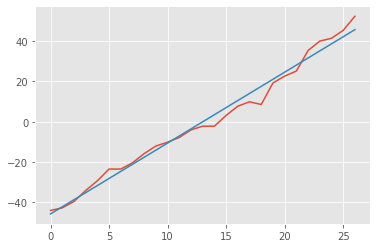

In [14]:
plt.plot(y)
plt.plot(trend*np.arange(27) + intercept)

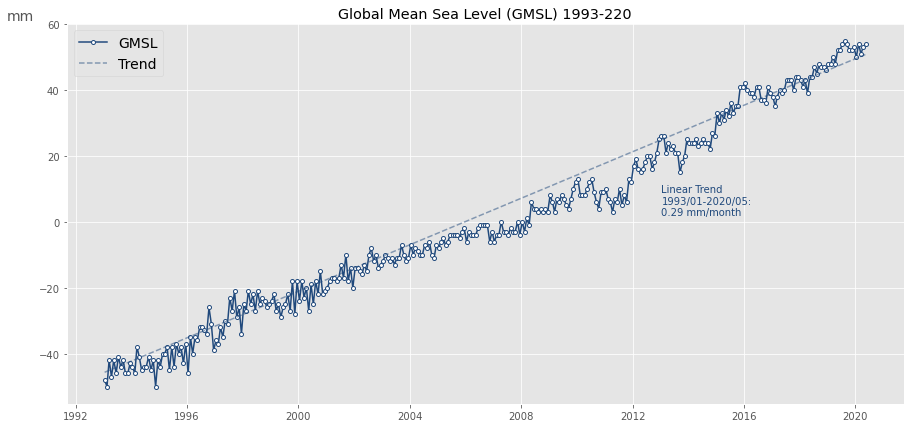

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
plt.plot(date, gmsl-np.mean(gmsl), color="#20497C", marker='o',
        markerfacecolor='white', markersize=4)
plt.plot(date, trend_month*np.arange(len(date)) + intercept, '--', color="#20497C", alpha=.5)
ax.set_title("Global Mean Sea Level (GMSL) 1993-220")
ax.legend(labels=["GMSL", "Trend"],fontsize= 14, loc='upper left')
ax.text(x=date[240], y=2, s=f"Linear Trend\n1993/01-2020/05:\n{trend_month[0]:.2f} mm/month", color='#20497C')
ax.set_ylabel("mm", rotation=0, loc="top", fontsize=14)
plt.savefig("../plots/day20_upwards.png");